In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

In [ ]:
alpha = 1. #mortality rate due to predators
beta = 1.
delta = 1.
gamma = 1.
x0 = 4.
y0 = 2.

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [ ]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
#res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
#x, y = res.T

No handles with labels found to put in legend.


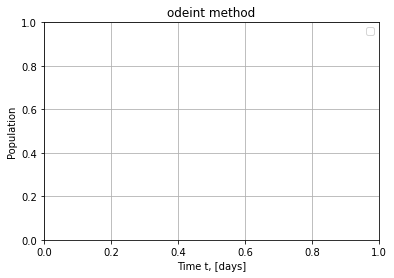

In [ ]:
plt.figure()
plt.grid()
plt.title("odeint method")
#plt.plot(t, x, 'xb', label = 'Deer')
#plt.plot(t, y, '+r', label = "Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

#plt.show()

No handles with labels found to put in legend.


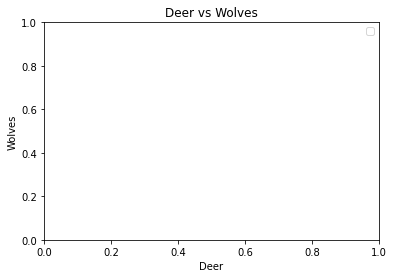

In [ ]:
plt.figure()
IC = np.linspace(1.0, 6.0, 21) # initial conditions for deer population (prey)
for deer in IC:
    X0 = [deer, 1.0]
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    #plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.legend()
plt.title("Deer vs Wolves");

In [ ]:
def Euler(func, X0, t, alpha, beta, delta, gamma):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i], alpha,  beta, delta, gamma) * dt
    return X

No handles with labels found to put in legend.


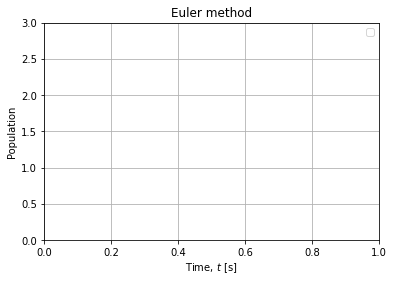

In [ ]:
Xe = Euler(derivative, X0, t, alpha, beta, delta, gamma)
#plt.figure()
plt.title("Euler method")
#plt.plot(t, Xe[:, 0], 'xb', label = 'Deer')
#plt.plot(t, Xe[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.ylim([0.,3.])
plt.legend(loc = "best")

#plt.show()

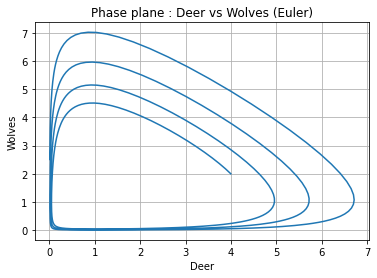

In [ ]:
plt.figure()
plt.plot(Xe[:, 0], Xe[:, 1], "-")
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.grid()
plt.title("Phase plane : Deer vs Wolves (Euler)");

In [ ]:
def RK2(func, X0, t, alpha,  beta, delta, gamma):
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0

    for i in range(nt-1):
        k1 = dt * func(X[i], t[i], alpha,  beta, delta, gamma)
        k2 = dt* func(X[i] + k1, t[i] + dt, alpha,  beta, delta, gamma)
        
        X[i+1] = X[i] + 1 / 2. * (k1 + k2)
        
    return X


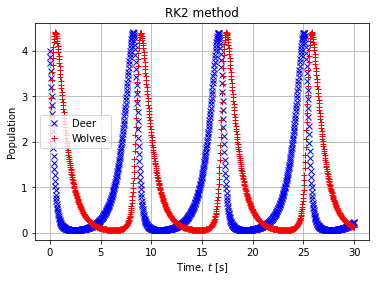

In [ ]:
Xrk2 = RK2(derivative, X0, t, alpha,  beta, delta, gamma)
plt.figure()
plt.title("RK2 method")
plt.plot(t, Xrk2[:, 0], 'xb', label = 'Deer')
plt.plot(t, Xrk2[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

plt.show();

In [ ]:
def RK4(func, X0, t, alpha,  beta, delta, gamma):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], alpha,  beta, delta, gamma)
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2., alpha,  beta, delta, gamma)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2., alpha,  beta, delta, gamma)
        k4 = func(X[i] + dt    * k3, t[i] + dt, alpha,  beta, delta, gamma)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

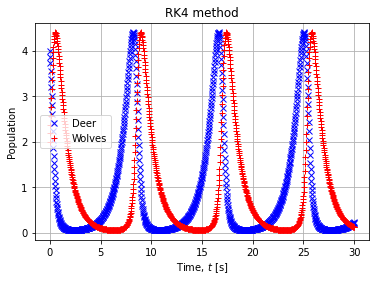

In [ ]:
Xrk4 = RK4(derivative, X0, t, alpha,  beta, delta, gamma)
plt.figure()
plt.title("RK4 method")
plt.plot(t, Xrk4[:, 0], 'xb', label = 'Deer')
plt.plot(t, Xrk4[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

plt.show();

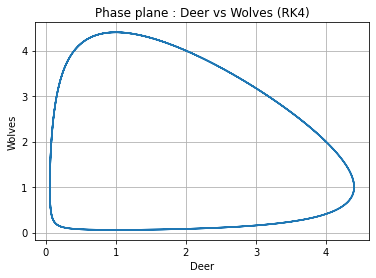

In [ ]:
plt.figure()
plt.plot(Xrk4[:, 0], Xrk4[:, 1], "-")
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.grid()
plt.title("Phase plane : Deer vs Wolves (RK4)");